# Ejercicio Exploratory Data Analysis – Project 2

### Lectura del archivo vgsales.csv y uso de librerías pandas, plotly, etc.

In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('E:\WORK IN PROGRESS\Data Analytics course\parte 2 python\week 20')

#### I took the databalse from:
- https://www.kaggle.com/datasets/pranavkrishna/vgsales

In [25]:
df = pd.read_csv('vgsales.csv')

In [26]:
df.shape

(16598, 11)

In [27]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7317,7319,Are You Smarter Than a 5th Grader? Back to School,Wii,2010.0,Misc,Nintendo,0.20,0.00,0.00,0.02,0.21
9288,9290,MLB 14: The Show,PSV,2014.0,Sports,Sony Computer Entertainment America,0.11,0.00,0.00,0.02,0.14
6286,6288,Suikoden Tierkreis,DS,2008.0,Role-Playing,Konami Digital Entertainment,0.09,0.01,0.15,0.01,0.27
546,547,Assassin's Creed IV: Black Flag,PS4,2013.0,Action,Ubisoft,1.07,1.31,0.06,0.31,2.74
3223,3225,Shin Megami Tensei: Persona 3 FES,PS2,2007.0,Role-Playing,Tecmo Koei,0.22,0.20,0.16,0.05,0.63


## Preparacion de datos

In [29]:
# Verifico si hay valores modulos en el dataset
missing_values_count=df.isnull().sum()
missing_values_count

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [30]:
# Elimina los valores nulos
df = df.dropna().reset_index(drop=True)

In [31]:
# verifico que hayan sido eliminados
missing_values_count=df.isnull().sum()
missing_values_count

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [33]:
# Cambio el tipo de datos para la columna "Year".
df['Year']= df['Year'].astype('int64')

In [37]:
# Agrupando los datos por año me doy cuenta que para los 
# 2 ultimos años del dataset no hay bastante datos
# 3 para el 2017 y 1 para el 2020. Por tal motivo, prefiero
# cancelarlos del data set antes que continuar a hacer un
# analisis precario. 
df.groupby('Year').size()

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     744
2005     936
2006    1008
2007    1201
2008    1428
2009    1431
2010    1257
2011    1136
2012     655
2013     546
2014     580
2015     614
2016     342
2017       3
2020       1
dtype: int64

In [38]:
# Estas son las filas que tendría que eliminar
df.loc[df['Year']>=2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5860,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14136,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
15944,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16135,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


<AxesSubplot: title={'center': 'Ventas globales de video juegos por año'}, xlabel='Año', ylabel='Ventas globales en millones'>

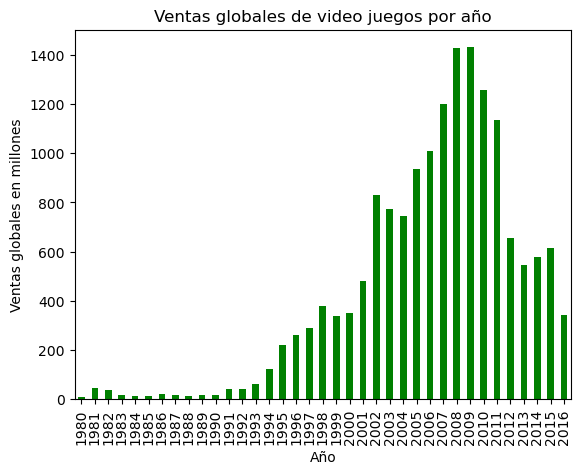

In [39]:
df.loc[df['Year']<2017].groupby('Year').size().plot.bar(xlabel='Año',ylabel='Ventas globales en millones',color='g',title='Ventas globales de video juegos por año')
# Gráfico de soporte para la presentación en Power Point.

In [40]:
# Reducir el dataset para los ultimos 4 años.

df=df[(df['Year']<2017)&(df['Year']>2012)]

df.groupby('Year').size()

Year
2013    546
2014    580
2015    614
2016    342
dtype: int64

In [41]:
df.shape

(2082, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 16 to 16282
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2082 non-null   int64  
 1   Name          2082 non-null   object 
 2   Platform      2082 non-null   object 
 3   Year          2082 non-null   int64  
 4   Genre         2082 non-null   object 
 5   Publisher     2082 non-null   object 
 6   NA_Sales      2082 non-null   float64
 7   EU_Sales      2082 non-null   float64
 8   JP_Sales      2082 non-null   float64
 9   Other_Sales   2082 non-null   float64
 10  Global_Sales  2082 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 195.2+ KB


In [43]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13387,13626,Amagami,PSV,2014,Adventure,Kadokawa Games,0.00,0.00,0.04,0.00,0.04
1651,1672,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20
10402,10593,Total War: WARHAMMER,PC,2016,Strategy,Sega,0.00,0.10,0.00,0.01,0.10
12593,12823,Legend of Kay,WiiU,2015,Action,Nordic Games,0.03,0.02,0.00,0.00,0.05
643,651,Need for Speed (2015),PS4,2015,Racing,Electronic Arts,0.49,1.49,0.05,0.36,2.39


In [45]:
pd.options.display.float_format = '{:.2f}'.format

# Ahora el dataset esta listo para realizar el correspondiente análisis.

# Crecimiento

### 1) qué género ha tenido el mayor y menor crecimiento

In [47]:
df_genre=pd.crosstab(df['Year'],df['Genre'], values=df['Global_Sales'], aggfunc='sum')#, margins=True)
df_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2013,125.22,6.61,7.21,25.65,25.12,0.99,13.04,44.92,62.80,8.67,41.55,6.33
2014,99.02,6.06,16.15,23.68,8.89,1.49,16.69,45.85,66.00,5.55,46.66,0.99
2015,70.70,8.03,7.78,11.69,6.05,0.70,7.92,36.44,66.15,5.62,41.54,1.82
2016,19.90,1.79,3.86,1.17,2.07,NaN,1.64,6.76,18.22,0.39,14.60,0.50


In [48]:
df_genrepct=df_genre.pct_change()
df_genrepct

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,-0.21,-0.08,1.24,-0.08,-0.65,0.51,0.28,0.02,0.05,-0.36,0.12,-0.84
2015,-0.29,0.33,-0.52,-0.51,-0.32,-0.53,-0.53,-0.21,0.00,0.01,-0.11,0.84
2016,-0.72,-0.78,-0.50,-0.90,-0.66,0.00,-0.79,-0.81,-0.72,-0.93,-0.65,-0.73


In [49]:
df_genrepct.style.background_gradient(cmap='Blues')

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2013,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2014,-0.209232,-0.083207,1.239945,-0.076803,-0.646099,0.505051,0.279908,0.020703,0.050955,-0.359862,0.122984,-0.843602
2015,-0.286003,0.325083,-0.518266,-0.506334,-0.319460,-0.530201,-0.525464,-0.205234,0.002273,0.012613,-0.109730,0.838384
2016,-0.718529,-0.777086,-0.503856,-0.899914,-0.657851,0.000000,-0.792929,-0.814490,-0.724565,-0.930605,-0.648532,-0.725275


In [51]:
df_genrepct.mean().sort_values(ascending=False)
 # En la siguiente tabla se puede apreciar que el unico genero 
 # que tuvo un crecimiento fue 'Fighting' mientras que 'Puzzle 
 # y adventure' tuvieron el menor dececimiento. Por otro lado,
 # 'Simulation', 'Misc' y 'Platform' fueron los generos con el
 # la mayor tasas de decrecimiento. 

Genre
Fighting        0.07
Puzzle         -0.01
Adventure      -0.18
Sports         -0.21
Shooter        -0.22
Strategy       -0.24
Role-Playing   -0.33
Racing         -0.35
Action         -0.40
Simulation     -0.43
Misc           -0.49
Platform       -0.54
dtype: float64

### 2) qué plataforma ha tenido el mayor y menor crecimiento

In [52]:
df_platform=pd.crosstab(df['Year'],df['Platform'], values=df['Global_Sales'], aggfunc='sum')#, margins=True)
df_platform

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2013,55.88,1.96,12.83,117.39,24.76,3.19,12.69,9.36,21.84,89.61,18.60
2014,43.13,0.02,13.39,50.96,98.76,0.24,14.74,4.44,22.51,36.41,52.43
2015,26.99,NaN,8.07,18.22,115.30,0.12,7.10,1.55,16.38,13.05,57.66
2016,6.60,NaN,2.60,2.59,39.25,NaN,3.37,NaN,3.29,0.83,12.37


In [53]:
df_platformpct=df_platform.pct_change()
df_platformpct

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,-0.23,-0.99,0.04,-0.57,2.99,-0.92,0.16,-0.53,0.03,-0.59,1.82
2015,-0.37,0.00,-0.40,-0.64,0.17,-0.50,-0.52,-0.65,-0.27,-0.64,0.10
2016,-0.76,0.00,-0.68,-0.86,-0.66,0.00,-0.53,0.00,-0.80,-0.94,-0.79


In [54]:
df_platformpct.style.background_gradient(cmap='Blues')

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2013,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2014,-0.228168,-0.989796,0.043648,-0.565891,2.988691,-0.924765,0.161545,-0.525641,0.030678,-0.593684,1.818817
2015,-0.374217,0.000000,-0.397311,-0.642465,0.167477,-0.500000,-0.518318,-0.650901,-0.272323,-0.641582,0.099752
2016,-0.755465,0.000000,-0.677819,-0.857849,-0.659584,0.000000,-0.525352,0.000000,-0.799145,-0.936398,-0.785467


In [56]:
df_platformpct.mean().sort_values(ascending=False)
# En la siguiente tabla se encuentran las tasas de
# crecimiento promedio de las consolas de video
# juegos comprendidos entre el periodo 2013-2016.
# En dicha tabla se puede observar que el 'PS4'y
# el 'XOne' son las consolas con mayor crecimiento.
# Mientras que el 'PS3' y el 'X360' tuvieron las 
# mayores tasas de decrecimiento.

Platform
PS4     0.83
XOne    0.38
PSV    -0.29
DS     -0.33
PC     -0.34
WiiU   -0.35
Wii    -0.39
3DS    -0.45
PSP    -0.47
PS3    -0.69
X360   -0.72
dtype: float64

### 3) qué videojuego ha tenido el mayor y menor crecimiento

In [57]:
df_videogame=pd.crosstab(df['Year'],df['Name'], values=df['Global_Sales'], aggfunc='sum')#, margins=True)
df_videogame.shape

(4, 1174)

In [64]:
df_videogamepct=df_videogame.pct_change()
df_videogamepct.mean().sort_values(ascending=False)[0:10]

# Aqui se pueden apreciar los videojuegos con las mayores
# tasas de crecimiento. Importante recalcar el hecho de que
# los primeros 4 juegos tuvieron un crecimiento mayor al
# 100% llegando por ejemplo hasta aumentar 8 veces el crecimiento
# de la tasa de ventas.

Name
Divinity: Original Sin                                      8.00
Don Bradman Cricket 14                                      2.17
The Elder Scrolls Online                                    1.16
Dead or Alive 5                                             1.03
The Walking Dead: Season One                                0.80
Warriors Orochi 3                                           0.57
Dungeon Travelers 2: The Royal Library & The Monster Seal   0.42
The Legend of Heroes: Trails in the Sky Third Chapter       0.33
Tropico 5                                                   0.29
One Piece: Unlimited World Red                              0.14
dtype: float64

In [62]:
df_helper=df_videogamepct.mean().sort_values(ascending=False).rename('Tasa media de crecimiento').reset_index()
missing_values_count=df_helper.isnull().sum()
missing_values_count

Name                           0
Tasa media de crecimiento    198
dtype: int64

In [63]:
df_videogamepct.mean().sort_values(ascending=False)[-10:]

# En teoria los videojuegos listados en la siguiente tabla
# corresponde a los ultimos 10 video juegos con el mayor
# decrecimiento. Sin embargo, en realidad son 198 los video
# juegos que no tienen una tasa de crecimiento porque probablemente
# fueron vendidos solo durante un ano en particular.

Name
World of Warcraft: Legion        NaN
Worms: WMD                       NaN
XCOM 2                           NaN
Yakuza Kiwami                    NaN
Yokai Sangokushi                 NaN
Yokai Watch 3                    NaN
Ys VIII: Lacrimosa of Dana       NaN
Yuusha Shisu.                    NaN
Zero Escape: Zero Time Dilemma   NaN
ZombiU                           NaN
dtype: float64

## 2 elementos adicionales que muestren oportunidades de mercado

([<matplotlib.axis.XTick at 0x1dd05425520>,
 [Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016')])

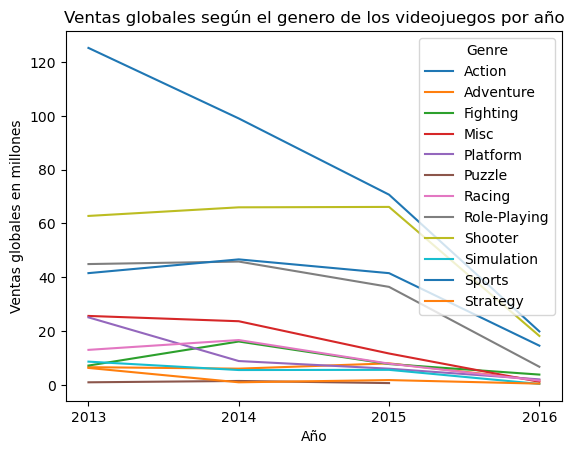

In [65]:
df_genre.plot(xlabel='Año',ylabel='Ventas globales en millones',title='Ventas globales según el genero de los videojuegos por año')
plt.xticks(np.arange(df['Year'].min(),df['Year'].max()+1,1.0))

([<matplotlib.axis.XTick at 0x1dd0560ee20>,
 [Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016')])

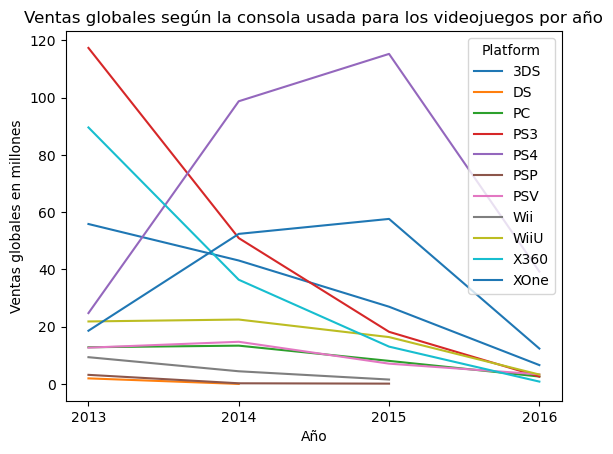

In [66]:
df_platform.plot(xlabel='Año',ylabel='Ventas globales en millones',title='Ventas globales según la consola usada para los videojuegos por año')
plt.xticks(np.arange(df['Year'].min(),df['Year'].max()+1,1.0))